## Data Preprocessing for Image/Video
In this week, we will play about data preprocessing for image/video. We will use part of [Caltect256](http://www.vision.caltech.edu/Image_Datasets/Caltech256/) dataset which originally consists of 257 classes, but we will use 3 classes of them for this hands-on purpose.

# Given Basic Code

In [1]:
import cv2, os
import numpy as np
from matplotlib import pyplot as plt
import skimage as sk

def read_dataset(dataset_path):
    """
    parameter:
    (a) dataset_path: path of the dataset [type: string]
    
    this function will return:
    (1) file_path: full path of each image file [type: 1D numpy array]
    (2) class_label: class of each image file, in numerical value [type: 1D numpy array]
    (3) class_dictionary: key(string) -> value (string), where 'key' is from (2) 
        and 'value' is from 'folder_name' [type: dictionary]
    """
    list_folder_per_kelas = os.listdir(dataset_path)
    list_folder_per_kelas = sorted(list_folder_per_kelas)
    file_path = []; class_label = np.ndarray(shape=(0)); class_dictionary = {}
    
    for i in range(len(list_folder_per_kelas)):#loop for all class folders
        class_folder_path = os.path.join(dataset_path, list_folder_per_kelas[i])
        list_image_name = os.listdir(class_folder_path)
        list_image_name = sorted(list_image_name)
        temp_file_path = [os.path.join(class_folder_path, j) for j in list_image_name]
        file_path += temp_file_path
        temp_class_label = np.full((len(list_image_name)),np.int16(i))
        class_label = np.concatenate((class_label, temp_class_label), axis=0)
        class_dictionary[str(i)] = list_folder_per_kelas[i]
    return np.asarray(file_path), class_label, class_dictionary

dataset_path = "./dataset/part_of_caltech256" # adjust with your own path
file_path, class_label, class_dictionary = read_dataset(dataset_path)   
print("file_path:\n", file_path[0:4], ", shape:", file_path.shape)
print("\nclass_label:\n", class_label[0:4], ", shape:", class_label.shape)
print("\nclass_dictionary:\n", class_dictionary)

file_path:
 ['./dataset/part_of_caltech256\\backpack\\003_0001.jpg'
 './dataset/part_of_caltech256\\backpack\\003_0002.jpg'
 './dataset/part_of_caltech256\\backpack\\003_0003.jpg'
 './dataset/part_of_caltech256\\backpack\\003_0004.jpg'] , shape: (150,)

class_label:
 [ 0.  0.  0.  0.] , shape: (150,)

class_dictionary:
 {'0': 'backpack', '1': 'butterfly', '2': 'cake'}


### Example of Read Image using OpenCV and Show via Matplotlib

img.shape: (500, 375, 3)


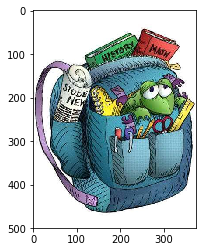

img.shape: (324, 222, 3)


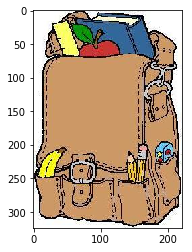

In [21]:
def read_image(image_path):
    '''
    function to read image given its image file path
    parameter:
    a. image_path: image file path
    '''
    # read as color image 
    img = cv2.imread(image_path, 1) #default opencv is in BGR, not RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB (matplotlib use RGB format)
    return img

def show_image(img):
    '''
    function to show image
    parameter:
    a. img: numpy.ndarray
    '''
    # in this hands-on, we will use matplotlib to show the image
    plt.imshow(img)
    plt.show()
    
def read_and_show(image_path):
    '''
    function to read and show a given image file path.
    parameter:
    a. image_path: image file path
    '''
    img = read_image(image_path)
    print("img.shape:", img.shape)
    show_image(img)

read_and_show(file_path[0])
read_and_show(file_path[1])

Two image examples above, we have different size of images, meanwhile in learning model, we need the inputs to have same size (dimension), i.e., having same number of features. Two methods to tackle this issue are: (i) resizing the image into a fixed same size, and (ii) applying zero padding.<br>


## Question 01 (Q01): image resizing
Please create a function that can resize all images in `file_path`.

preprocessed_images.shape: (150, 100, 100, 3)


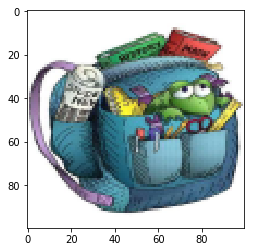

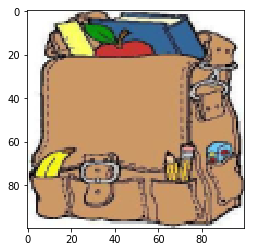

In [41]:
def resize_image(img_path, size=(100, 100)):
    '''
    parameter:
    a. img_path: file_path, which is 1D numpy array of all image file paths 
                 in the "Given Basic Code".
    b. size: tupple of desired image sizes, which is (height, width).
             In this hands-on week, use the default value of (100, 100).

    return:
    a. prepocessed_images = 4D numpy array with the size of 
                            (150,  desired_height, desired_width, 3).
    HINT: use "cv2.resize()" API to resize the image

    Tasks:
    a. prepocessed_images is in RGB format
    b. Please show first-two prepocessed_images with their sizes. 
       Make sure that both sizes are same.
    '''
    preprocessed_images = []
    for path in img_path:
        img = read_image(path)

        height = img.shape[1]
        width = img.shape[2]
        resize_height, resize_width = size

        # interpolation method
        if height > resize_height or width > resize_width:
            # shrinking image
            interpolation_method = cv2.INTER_AREA
        else:
            # stretching image
            interpolation_method = cv2.INTER_CUBIC
    
        resized_img = cv2.resize(img, (size[1], size[0]), interpolation=interpolation_method)
        preprocessed_images += [resized_img]

    preprocessed_images = np.array(preprocessed_images)
    print("preprocessed_images.shape:", preprocessed_images.shape)
    return preprocessed_images

resized_images = resize_image(file_path)

show_image(resized_images[0])
show_image(resized_images[1])

## Question 02 (Q02): zero-padding
Please create a function that can apply zero padding to all images in `file_path`.

preprocessed_images.shape: (150, 100, 100, 3)


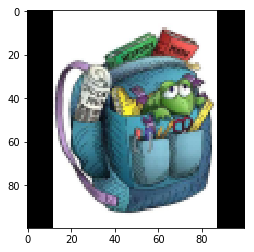

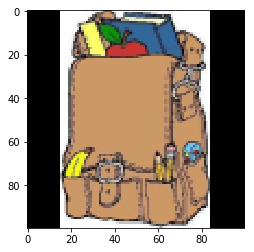

In [127]:
def apply_zeropadding(img_path, size=(100, 100)):
    '''
    parameter:
    a. img_path: file_path, which is 1D numpy array of all image file paths 
                 in the "Given Basic Code".
    b. size: tupple of desired image sizes after zero padding, which is (height, width).
             In this hands-on week, use the default value of (100, 100).

    return:
    a. prepocessed_images = 4D numpy array with the size of 
                            (150,  desired_height, desired_width, 3).
    HINT: use "cv2.resize()" API so that the longer dimension becomes 100,
           then, pad the shorter dimension with zero intensity values.

    Tasks:
    a. prepocessed_images is in RGB format
    b. Please show first-two prepocessed_images with their sizes. 
       Make sure that both sizes are same.
    '''
    BLACK = [0,0,0]
    
    preprocessed_images = []
    for path in img_path:
        img = read_image(path)
        height, width = img.shape[0], img.shape[1]
        aspect = width/height

        if (aspect > 1):
            resize_width = size[1]
            resize_height = np.round(resize_width/aspect).astype(int)
    
            pad_vertical = resize_width - resize_height
            pad_top = pad_vertical//2
            pad_bottom = pad_vertical - pad_top
            pad_left, pad_right = 0, 0
        else:
            resize_height = size[0]
            resize_width = np.round(resize_height*aspect).astype(int)

            pad_horizontal = resize_height - resize_width
            pad_left = pad_horizontal//2
            pad_right = pad_horizontal - pad_left
            pad_top, pad_bottom = 0, 0

        resized_img = cv2.resize(img, (resize_width, resize_height), interpolation=cv2.INTER_AREA)
        zeropadded_img = cv2.copyMakeBorder(resized_img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=BLACK)
        preprocessed_images += [zeropadded_img]

    preprocessed_images = np.array(preprocessed_images)
    print("preprocessed_images.shape:", preprocessed_images.shape)
    return preprocessed_images

zeropadded_images = apply_zeropadding(file_path)

show_image(zeropadded_images[0])
show_image(zeropadded_images[1])

## Question 03 (Q03): grayscale image
Sometimes, using color images is too much so that our model becomes computationally expensive. Please make a function that can convert `prepocessed_images` from the result of `apply_zeropadding` function to grayscale images.

grayscale_images.shape: (150, 100, 100)


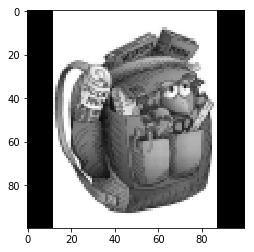

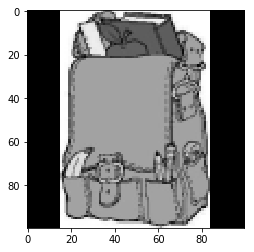

In [158]:
def convert_to_grayscale(input):
    '''
    parameter:
    a. input_images: "prepocessed_images" variable from the result of "apply_zeropadding" function.

    return:
    a. grayscale_images = 4D numpy array with the size of 
                          (150,  100, 100).
    HINT: use "cv2.cvtColor" API 
    
    Tasks:
    a. After finishing this function, use the function and show first-two "grayscale_images".
    '''
    grayscaled_images = []
    for img in input:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        grayscaled_images += [img_gray]

    grayscaled_images = np.array(grayscaled_images)
    print("grayscale_images.shape:", grayscaled_images.shape)
    return grayscaled_images

grayscaled_images = convert_to_grayscale(zeropadded_images)

for i in range(0, 2):
    plt.imshow(grayscaled_images[i], cmap='gray')
    plt.show()

## Question 04 (Q04): 1D features
Image is a spatial data, having heigh and width. A method like CNN (Convolutional Neural Network) is designed for this type of input data. However, for certain purpose, we may use other methods, such as SVM, random forest, etc, and those all prefer to use 1D feature. Thus, please make a function that can perform such need.

In [207]:
def convert_to_onedimfeature(input):
    '''
    parameter:
    a. input: "grayscale_images" variable from the result of "convert_to_grayscale" function.

    return:
    a. onedim_features = 2D numpy array with the size of 
                         (150,  10000).
    HINT: very easy~ 
    '''
    onedim_features = []
    for img in input:
        # Convert to black and white 
        thresh, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        flattened_feat = bw_img.flatten()
        
        # Convert 0 and 255 to 0 and 1
        converted_feat = np.where(flattened_feat == 255, 1, 0)
        onedim_features += [converted_feat]

    onedim_features = np.array(onedim_features)
    print("onedim_features.shape:", onedim_features.shape)
    return onedim_features

convert_to_onedimfeature(grayscaled_images)

onedim_features.shape: (150, 10000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Image Augmentation
In image data, there are unlimited possibilities of the visual appearances, such as illumination (lighting), point of view, zooming factor, noise, etc, even from single same object. To have a better model, we need a model that is more general to any possible visual appearance of the input image. To tackle this issue, we can apply data augmentation to the training set. See picture below.
<img src="cat_data_augmentation.png" alt="" width="500"/>

Eight pictures above are generated from one-same image. To generate those various image appeareances, we can apply, such as: (i) random flipping, (ii) random rotation, (iii) random translation, (iv) random zooming, (v) image shearing, (vi) add random noise, (vii) random cropping, etc. 

## Question 05 (Q05): Image Augmentation
In this Q05, you are asked to make a simple `data_augmentation` function with only two treatments: (i) radom rotation and (ii) random noise.<br>
**HINT**: For both (i) and (ii), you can use scikit-image libary API, which are `transform.rotate` from -25 to 25 degree and `util.random_noise`, respectively.

augmented_images.shape: (150, 100, 100, 3)


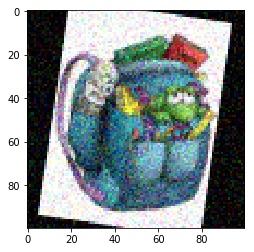

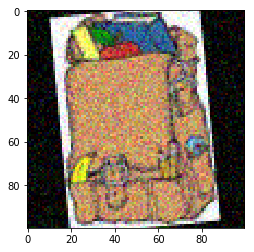

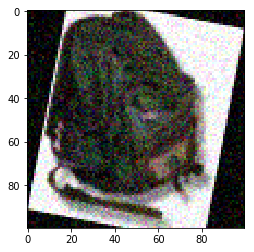

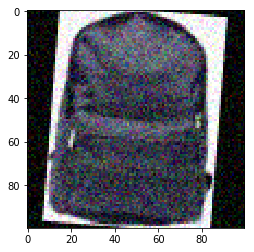

In [201]:
import random

def image_augmentation(input):
    '''
    parameter: 
    a. input: "prepocessed_images" variable from the result of "apply_zeropadding" function.
    
    return: 
    a. augmented_images: 4D numpy array with the size of 
                         (150,  desired_height, desired_width, 3), 
                         where each image is already randomly being applied
                         by the transformation: (i) random rotation & (ii) random noise.
                         
    task:
    a. After finishing this function, use the function and show first-four "augmented_images".
    '''
    augmented_images = []
    for img in input:
        # Random rotation
        angle = random.uniform(-25, 25)
        rotated_img = sk.transform.rotate(img, angle)
        # Random noise
        noised_img = sk.util.random_noise(rotated_img, mode='gaussian', clip=True)
        augmented_images += [noised_img]

    augmented_images = np.array(augmented_images)
    print("augmented_images.shape:", augmented_images.shape)
    return augmented_images

augmented_images = image_augmentation(zeropadded_images)

for i in range(0, 4):
    show_image(augmented_images[i])

## Question 06 (Q06): extract a video
Video is actually a sequence of images (frames). In this Q06, you are simply asked to make a function that can extract a video to images (frames).

extracted_images.shape: (119, 360, 640, 3)


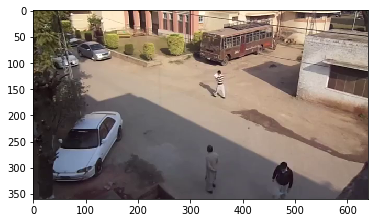

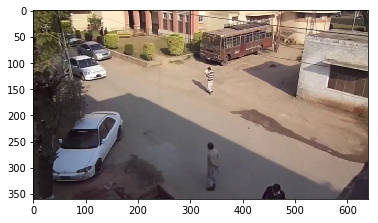

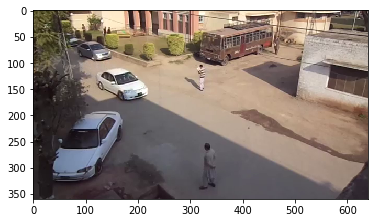

In [202]:
def extract_video(video_input):
    '''
    parameter:
    a. video_input: path of "video01.mp4" (provided in the zip file)
    
    return:
    a. extracted_images: 4D numpy array with the size of
                         (50, video_height=360, video_width=640, 3),
                         meaning that you are asked only to extract
                         firs 50 frames of the video.
    Task:
    a. show the 1st, 25th and 50th image frames you extract from the given video.
                         
    HINT: use "cv2.VideoCapture" and ".read()" API for this Q06.
    '''
    cap = cv2.VideoCapture(video_input)
    extracted_images = []
    
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            frame_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            extracted_images += [frame_img]
        else:
            break
    cap.release()
    
    extracted_images = np.array(extracted_images)
    print("extracted_images.shape:", extracted_images.shape)
    return extracted_images

extracted_images = extract_video('dataset/video01.mp4')

show_image(extracted_images[0])
show_image(extracted_images[24])
show_image(extracted_images[49])

# Note:

After pre-processing all those images/videos, it's ready to feed them in to our learning model, such as classifier, since they are already in numerical data/features and have same feature size/dimension. Enjoy~